# Training DenseNet on Cifar10 using ADAM

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/DL_project/
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1rxvBmpHEy23c0WZ6V3NFhmsmCCJ4quW5/DL_project
/content/drive/.shortcut-targets-by-id/1rxvBmpHEy23c0WZ6V3NFhmsmCCJ4quW5/DL_project


In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import *
import os
import time
import gc
import shutil
import h5py

from dfw.dfw import DFW
from dfw.dfw.losses import set_smoothing_enabled
from dfw.dfw.losses import MultiClassHingeLoss
from dfw.experiments.models.densenet import DenseNet3
from dfw.experiments.models.wide_resnet import WideResNet

from train_utils import *

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
os.makedirs("data/cifar", exist_ok=True)
train_dataset_10 = CIFAR10(root='data/cifar', download=True, transform=transform)
test_dataset_10 = CIFAR10(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_10), len(test_dataset_10))

train_dataset_100 = CIFAR100(root='data/cifar', download=True, transform=transform)
test_dataset_100 = CIFAR100(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_100), len(test_dataset_100))

Files already downloaded and verified
50000 10000
Files already downloaded and verified
50000 10000


cuda Tesla T4
Epoch:0   Loss:1.215   Val loss:0.956   Accuracy:66.013   Best val loss:0.956   Time taken:243.626
Epoch:1   Loss:0.791   Val loss:0.794   Accuracy:72.691   Best val loss:0.794   Time taken:248.374
Epoch:2   Loss:0.612   Val loss:0.681   Accuracy:77.04   Best val loss:0.681   Time taken:251.281
Epoch:3   Loss:0.504   Val loss:0.646   Accuracy:77.438   Best val loss:0.646   Time taken:249.999
Epoch:4   Loss:0.436   Val loss:0.502   Accuracy:82.793   Best val loss:0.502   Time taken:249.228
Epoch:5   Loss:0.392   Val loss:0.478   Accuracy:83.788   Best val loss:0.478   Time taken:249.024
Epoch:6   Loss:0.348   Val loss:0.486   Accuracy:83.151   Best val loss:0.478   Time taken:248.773
Epoch:7   Loss:0.312   Val loss:0.425   Accuracy:85.609   Best val loss:0.425   Time taken:248.308
Epoch:8   Loss:0.284   Val loss:0.489   Accuracy:83.897   Best val loss:0.425   Time taken:250.166
Epoch:9   Loss:0.265   Val loss:0.427   Accuracy:85.38   Best val loss:0.425   Time taken:252.21

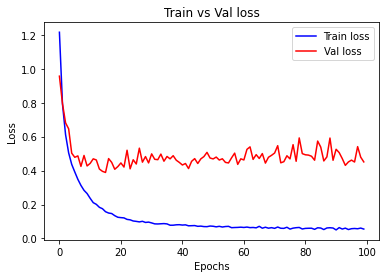

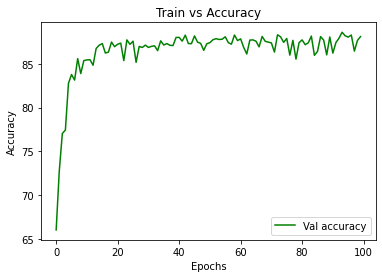

Best epoch: 15


In [ ]:
trainer = Net_Trainer(device, 'dn', 'dn_adam_c10', train_dataset_10, test_dataset_10, lr=0.001, optm='adam', loss='ce', batch_size=64, epochs=100, 
                      weight_decay=1e-4, smooth=False)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)